In [1]:
import tensorflow as tf
assert tf.__version__
import os
import numpy as np
import matplotlib.pyplot as plt
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras import losses

In [2]:
#split the Standford dog dataset into train and test set
#this dataset download from https://www.kaggle.com/carlosmiao/dogbreedidentification based on Stanford Dataset
train_image_dir = 'D:\\Downloads\\train'
test_image_dir = 'D:\\Downloads\\test'

In [3]:
import pandas as pd
labels = pd.read_csv('D:\\Downloads\\labels.csv', index_col = 'id')

In [4]:
labels.head()

,breed
id,
000bec180eb18c7604dcecc8fe0dba07,boston_bull
001513dfcb2ffafc82cccf4d8bbaba97,dingo
001cdf01b096e06d78e9e5112d419397,pekinese
00214f311d5d2247d5dfe4fe24b2303d,bluetick
0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [5]:
classes = labels.breed.unique()

In [6]:
#put image with same label in one directory
def create_dir(path):
    if os.path.exists(path) != True:
        os.makedirs(path)

In [7]:
train_path = create_dir("D:\\Downloads\\train_dataset")
test_path = create_dir("D:\\Downloads\\test_dataset")

In [8]:
import shutil
for breed in classes:
    class_path = "D:\\Downloads\\train_dataset\\"+breed
    create_dir(class_path)
    # copy images 
    images = labels[labels.breed == breed].index
    for image in images:
        source = train_image_dir+'\\'+f'{image}.jpg'
        target = class_path+'\\'+f'{image}.jpg'                            
        shutil.copyfile(source,target)

In [9]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip=True,
    validation_split=0.2)

In [10]:
batch_size = 64
height = 224
width = 224
train_dt = generator.flow_from_directory(
    "D:\\Downloads\\train_dataset",
    shuffle = True,
    target_size=(height, width),
    batch_size=batch_size,
    subset="training")

Found 8221 images belonging to 120 classes.


In [11]:
val_dt = generator.flow_from_directory(
    "D:\\Downloads\\train_dataset",
    shuffle = True,
    target_size=(height,width),
    batch_size=batch_size,
    subset="validation"
)

Found 2001 images belonging to 120 classes.


In [16]:
from tensorflow.keras.applications import xception
from tensorflow.keras.applications import inception_v3
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras import losses

In [61]:
base_xception = xception.Xception(weights='imagenet', include_top=False, input_shape=(height,width,3))
base_inception = inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=(height,width,3))

In [62]:
base_xception.trainable = False
base_inception.trainable = False

In [69]:
base_xception_model = Sequential([
    base_xception,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.7),
    layers.Dense(120, activation='softmax'),
])

In [63]:
base_inception_model = Sequential([
    base_inception,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.7),
    layers.Dense(120, activation='softmax'),
])

In [56]:
epochs = 15

In [70]:
base_xception_model.compile(optimizer='adam',
                            loss='categorical_crossentropy',
                            metrics=['accuracy'])

In [64]:
base_inception_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [71]:
history_xception = base_xception_model.fit(
    train_dt,
    validation_data=val_dt,
    epochs=epochs,
    callbacks = [callback],
)

Epoch 1/15
129/129 [==============================] - 568s 4s/step - loss: 2.2341 - accuracy: 0.4903 - val_loss: 0.9398 - val_accuracy: 0.7541
Epoch 2/15
129/129 [==============================] - 584s 5s/step - loss: 0.9666 - accuracy: 0.7255 - val_loss: 0.7798 - val_accuracy: 0.7756
Epoch 3/15
129/129 [==============================] - 565s 4s/step - loss: 0.8194 - accuracy: 0.7602 - val_loss: 0.7527 - val_accuracy: 0.7736
Epoch 4/15
129/129 [==============================] - 585s 5s/step - loss: 0.7484 - accuracy: 0.7734 - val_loss: 0.7452 - val_accuracy: 0.7791
Epoch 5/15
129/129 [==============================] - 10579s 83s/step - loss: 0.7156 - accuracy: 0.7853 - val_loss: 0.7272 - val_accuracy: 0.7841
Epoch 6/15
129/129 [==============================] - 534s 4s/step - loss: 0.6757 - accuracy: 0.7942 - val_loss: 0.7399 - val_accuracy: 0.7841
Epoch 7/15
129/129 [==============================] - 3416s 27s/step - loss: 0.6630 - accuracy: 0.7944 - val_loss: 0.7536 - val_accuracy: 0

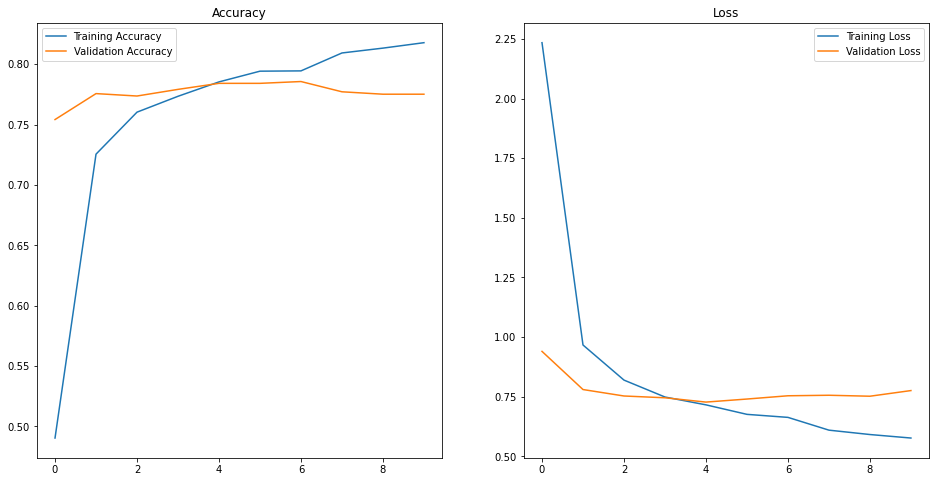

In [73]:
train_acc = history_xception.history['accuracy']
val_acc = history_xception.history['val_accuracy']

train_loss = history_xception.history['loss']
val_loss = history_xception.history['val_loss']

range_epochs = range(10)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(range_epochs, train_acc, label='Training Accuracy')
plt.plot(range_epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range_epochs, train_loss, label='Training Loss')
plt.plot(range_epochs, val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [66]:
history_inception_model = base_inception_model.fit(
    train_dt,
    validation_data=val_dt,
    epochs=epochs,
    callbacks = [callback],
)

Epoch 1/15
129/129 [==============================] - 288s 2s/step - loss: 2.7542 - accuracy: 0.4136 - val_loss: 0.8632 - val_accuracy: 0.7471
Epoch 2/15
129/129 [==============================] - 305s 2s/step - loss: 1.2582 - accuracy: 0.6683 - val_loss: 0.8679 - val_accuracy: 0.7401
Epoch 3/15
129/129 [==============================] - 310s 2s/step - loss: 1.0943 - accuracy: 0.7105 - val_loss: 0.8468 - val_accuracy: 0.7596
Epoch 4/15
129/129 [==============================] - 311s 2s/step - loss: 0.9973 - accuracy: 0.7356 - val_loss: 0.8593 - val_accuracy: 0.7676
Epoch 5/15
129/129 [==============================] - 323s 3s/step - loss: 0.9672 - accuracy: 0.7480 - val_loss: 0.8647 - val_accuracy: 0.7671
Epoch 6/15
129/129 [==============================] - 310s 2s/step - loss: 0.9334 - accuracy: 0.7511 - val_loss: 0.8733 - val_accuracy: 0.7621
Epoch 7/15
129/129 [==============================] - 307s 2s/step - loss: 0.8654 - accuracy: 0.7658 - val_loss: 0.9142 - val_accuracy: 0.7671

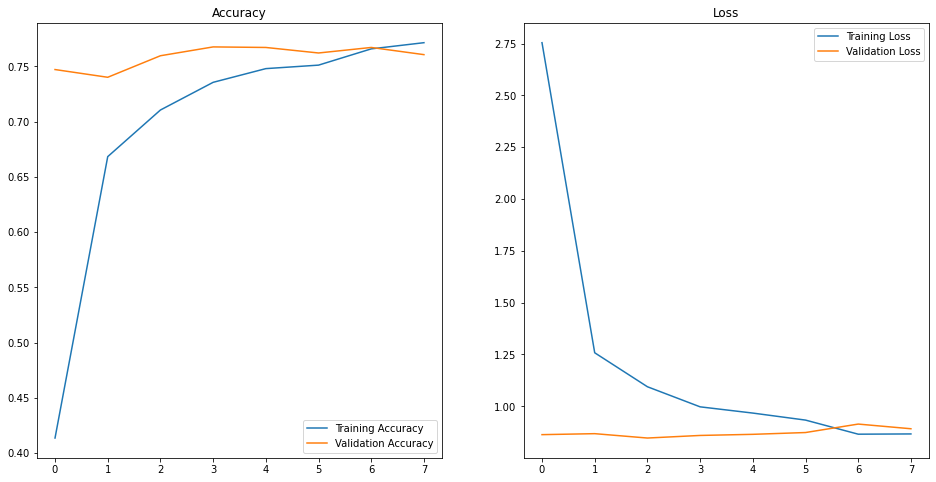

In [68]:
train_acc = history_inception_model.history['accuracy']
val_acc = history_inception_model.history['val_accuracy']

train_loss = history_inception_model.history['loss']
val_loss = history_inception_model.history['val_loss']

range_epochs = range(8)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(range_epochs, train_acc, label='Training Accuracy')
plt.plot(range_epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range_epochs, train_loss, label='Training Loss')
plt.plot(range_epochs, val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [58]:
history_MobileNetV2 = base_MobileNetV2_model.fit(
    train_dt,
    validation_data=val_dt,
    epochs=epochs,
    callbacks = [callback],
)

Epoch 1/15
129/129 [==============================] - 167s 1s/step - loss: 3.6780 - accuracy: 0.2084 - val_loss: 1.5935 - val_accuracy: 0.6032
Epoch 2/15
129/129 [==============================] - 188s 1s/step - loss: 1.9094 - accuracy: 0.4835 - val_loss: 1.1855 - val_accuracy: 0.6712
Epoch 3/15
129/129 [==============================] - 182s 1s/step - loss: 1.5015 - accuracy: 0.5755 - val_loss: 1.0612 - val_accuracy: 0.6927
Epoch 4/15
129/129 [==============================] - 179s 1s/step - loss: 1.3105 - accuracy: 0.6216 - val_loss: 0.9962 - val_accuracy: 0.7081
Epoch 5/15
129/129 [==============================] - 177s 1s/step - loss: 1.2008 - accuracy: 0.6508 - val_loss: 0.9801 - val_accuracy: 0.7091
Epoch 6/15
129/129 [==============================] - 176s 1s/step - loss: 1.1382 - accuracy: 0.6670 - val_loss: 0.9597 - val_accuracy: 0.7156
Epoch 7/15
129/129 [==============================] - 182s 1s/step - loss: 1.0646 - accuracy: 0.6770 - val_loss: 0.9644 - val_accuracy: 0.7101

In [77]:
#expor labels.txt
print (train_dt.class_indices)

labels = '\n'.join(sorted(train_dt.class_indices.keys()))

with open('D:\Downloads\labels.txt', 'w') as f:
    f.write(labels)

{'affenpinscher': 0, 'afghan_hound': 1, 'african_hunting_dog': 2, 'airedale': 3, 'american_staffordshire_terrier': 4, 'appenzeller': 5, 'australian_terrier': 6, 'basenji': 7, 'basset': 8, 'beagle': 9, 'bedlington_terrier': 10, 'bernese_mountain_dog': 11, 'black-and-tan_coonhound': 12, 'blenheim_spaniel': 13, 'bloodhound': 14, 'bluetick': 15, 'border_collie': 16, 'border_terrier': 17, 'borzoi': 18, 'boston_bull': 19, 'bouvier_des_flandres': 20, 'boxer': 21, 'brabancon_griffon': 22, 'briard': 23, 'brittany_spaniel': 24, 'bull_mastiff': 25, 'cairn': 26, 'cardigan': 27, 'chesapeake_bay_retriever': 28, 'chihuahua': 29, 'chow': 30, 'clumber': 31, 'cocker_spaniel': 32, 'collie': 33, 'curly-coated_retriever': 34, 'dandie_dinmont': 35, 'dhole': 36, 'dingo': 37, 'doberman': 38, 'english_foxhound': 39, 'english_setter': 40, 'english_springer': 41, 'entlebucher': 42, 'eskimo_dog': 43, 'flat-coated_retriever': 44, 'french_bulldog': 45, 'german_shepherd': 46, 'german_short-haired_pointer': 47, 'gian

In [78]:
#choose xception
model_dir = 'D:\Downloads'
tf.saved_model.save(base_xception_model, model_dir)

tfConverter = tf.lite.TFLiteConverter.from_saved_model(model_dir)
tflite_model = tfConverter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: D:\Downloads\assets
